# Age Profile of Los Angeles
This notebook demonstrates the use of census data to display census tracts on a map, as well as charts the mean ages of those census tracts. As I progress, I would like to incorporate the mean age data into the census tract map I made. To get the census tracts, shapefiles obained from TIGERLINE, were converted into a geojson. The mean age data was obtained from the census. I want to merge the two in order to attach the mean age data to each census tract. My main difficulty was altering the json. Converting it into a CSV, adding a mean age column, and back into a json was giving me errors. I'm sure that ambition is possible, but Im not there yet.
#### by Matthew Aijala

#### First we need to import the relevent libraries

In [131]:
import pandas as pd
import geopandas as gpd

#### Now we will use bring a CSV into a useable format to use in the rest of the code

In [132]:
census_data = pd.read_csv('CensusTract_Age.csv')

#### Quickly examine the table to make sure relevent data was included

In [133]:
census_data.head()

Tract Number Mean Age   Latitude   Longitude                 GEOID
0        101110     44.3  34.259555 -118.293602  1400000US06037101110
1        101122     52.2  34.267357 -118.290240  1400000US06037101122
2        101220     42.2  34.251998 -118.292687  1400000US06037101210
3        101221     40.5  34.251190 -118.281014  1400000US06037101220
4        101222     39.3  34.245595 -118.271731  1400000US06037101300

#### Import the libraries needed to make the map

In [134]:
import json
import folium

#### The starting location of the map is derived from the census data that was brought in earlier.

In [135]:
latitude = census_data['Latitude'].mean()
longitude = census_data['Longitude'].mean()
m = folium.Map(location=[latitude, longitude], zoom_start=10.5)

#### Encoding the json to UTF-8.
This took a bit of googling to figure out why it my original data wasn't working

In [136]:
with open('tl_2020_06_tract.json',encoding='utf-8-sig') as f:
    data = json.load(f)

#### Adding the census tracts to the map
adding a geojson data layer to the map and creating a tooltip that displays the 'TRACTCE' field value when hovering over a feature.

In [137]:
folium.GeoJson(data, name='geojson',
               tooltip=folium.features.GeoJsonTooltip(fields=['TRACTCE'], labels=False, sticky=False,
                                                     localize=True, style=None,
                                                     alias='Tract Number: '),
              ).add_to(m)

#### Display the map

In [138]:
m

#### convert the 'Mean Age' to numeric data so it can be plotted

In [139]:
census_data['Mean Age'] = pd.to_numeric(census_data['Mean Age'], errors='coerce')

#### Verifying that the Mean Age is now numeric

In [140]:
print(census_data['Mean Age'].dtype)

float64


##### using pandas .hist to create a histogram

array([[<AxesSubplot: title={'center': 'Mean Age'}>]], dtype=object)

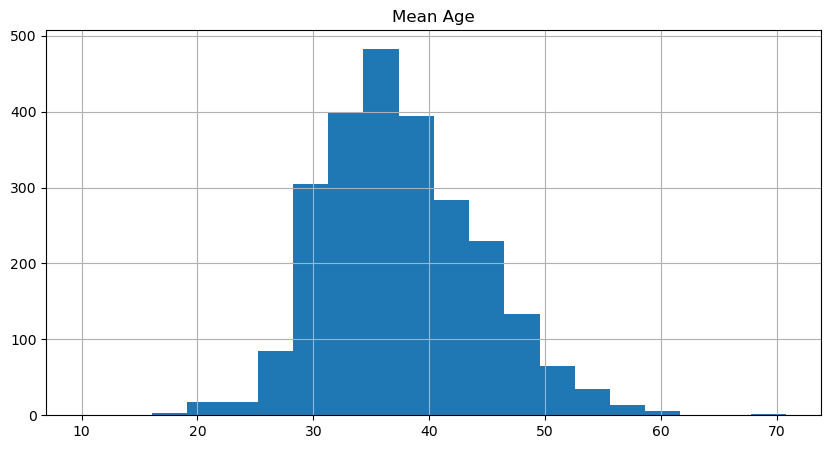

In [141]:
census_data.hist(column='Mean Age', bins=20, figsize=(10,5))

#### Using matplotlib to create a Box Plot

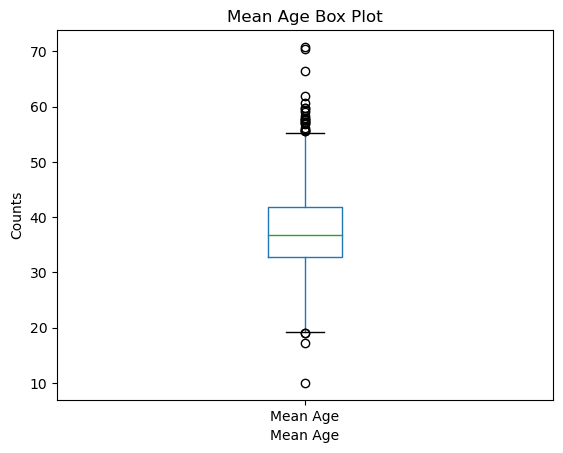

In [142]:
import matplotlib.pyplot as plt

census_data.boxplot(column='Mean Age', grid=False)

plt.title('Mean Age Box Plot')
plt.xlabel('Mean Age')
plt.ylabel('Counts')

plt.show()